In [1]:
from hossam import load_data
from pandas import DataFrame, get_dummies
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin=load_data('pima_indians_diabetes')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/kaggle/pima_indians_diabetes.xlsx
[desc] 이 데이터 세트는 원래 미국 국립 당뇨병·소화기·신장질환 연구소(National Institute of Diabetes and Digestive and Kidney Diseases)에서 제공한 것입니다. 이 데이터 세트의 목적은 데이터 세트에 포함된 특정 진단 측정값을 기반으로 환자의 당뇨병 여부를 진단적으로 예측하는 것입니다. 더 큰 데이터베이스에서 이러한 사례를 선택하는 데에는 몇 가지 제약 조건이 적용되었습니다. 특히, 여기에 포함된 모든 환자는 21세 이상의 피마 인디언 혈통을 가진 여성입니다. (출처: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

field                     type    description
------------------------  ------  --------------------------------
Pregnancies               연속형  임신횟수
Glucose                   연속형  포도당 부하 검사 수치
BloodPressure             연속형  혈압
SkinThickness             연속형  팔 삼두근 뒤쪽의 피하지방 측정값
Insulin                   연속형  혈청 인슐린
BMI                       연속형  체질량 지수
DiabetesPedigreeFunction  연속형  당뇨 내력 가중치 값
Age                       연속형  나이
Outcome                   명목형  당뇨여부(0 또는 1)


===== 데이터 크기 확인 =====
데이터셋 크기 : (768, 9)
행 개수 : 768개
열 개수 : 9개

===== 타입 확인 =====
<class

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Optimization terminated successfully.
         Current function value: 0.516943
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Dec 2025   Pseudo R-squ.:                  0.2008
Time:                        11:31:01   Log-Likelihood:                -397.01
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 8.305e-39
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -25.6571      2.490    -10.303      0.000

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specif city, TNR)",RAS(auc score),F1_score
0,0.200768,0.769531,0.719807,0.55597,0.116,0.884,0.719985,0.627368


,종속변수,독립변수,B(β),표준오차,z,p-value,OR,CI_lower,CI_upper,VIF
0,Outcome,log_Pregnancies,0.3125,0.136,2.305*,0.021,1.366838,1.047012,1.784360,5.186143
1,Outcome,log_Glucose,2.9775,0.404,7.366***,0.000,19.638659,8.896518,43.351443,88.500549
2,Outcome,log_BloodPressure,-0.2716,0.106,-2.562*,0.010,0.762159,0.619180,0.938155,25.483998
3,Outcome,log_SkinThickness,0.0359,0.077,0.469,0.639,1.036552,0.891348,1.205410,6.105680
4,Outcome,log_Insulin,-0.0416,0.047,-0.879,0.379,0.959253,0.874835,1.051818,3.618666
5,Outcome,log_BMI,1.9870,0.467,4.253***,0.000,7.293620,2.920281,18.216358,59.762583
6,Outcome,log_DiabetesPedigreeFunction,1.6688,0.452,3.689***,0.000,5.305797,2.187764,12.867696,4.668408
7,Outcome,log_Age,1.1022,0.342,3.220**,0.001,3.010782,1.540150,5.885667,118.849755


'Pseudo R²(McFadden) = 0.201, LLR X²(8) = 199.460, p-value = 0.0000, Accuracy = 0.770, AUC = 0.720'

'Outcome에 대하여 log_Pregnancies, log_Glucose, log_BloodPressure, log_SkinThickness, log_Insulin, log_BMI, log_DiabetesPedigreeFunction, log_Age로 예측하는 로지스틱 회귀분석을 실시한 결과, 모형은 통계적으로 유의(X²(8) = 199.460, p ≤ 0.05)하였다.'

['log_Pregnancies의 오즈비는 1.367(p ≤ 0.05)로, Outcome 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.',
 'log_Glucose의 오즈비는 19.639(p ≤ 0.05)로, Outcome 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.',
 'log_BloodPressure의 오즈비는 0.762(p ≤ 0.05)로, Outcome 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.',
 'log_SkinThickness의 오즈비는 1.037(p > 0.05)로, Outcome 발생 odds에 유의하지 않은 영향을 미치는 것으로 나타났다.',
 'log_Insulin의 오즈비는 0.959(p > 0.05)로, Outcome 발생 odds에 유의하지 않은 영향을 미치는 것으로 나타났다.',
 'log_BMI의 오즈비는 7.294(p ≤ 0.05)로, Outcome 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.',
 'log_DiabetesPedigreeFunction의 오즈비는 5.306(p ≤ 0.05)로, Outcome 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.',
 'log_Age의 오즈비는 3.011(p ≤ 0.05)로, Outcome 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.']

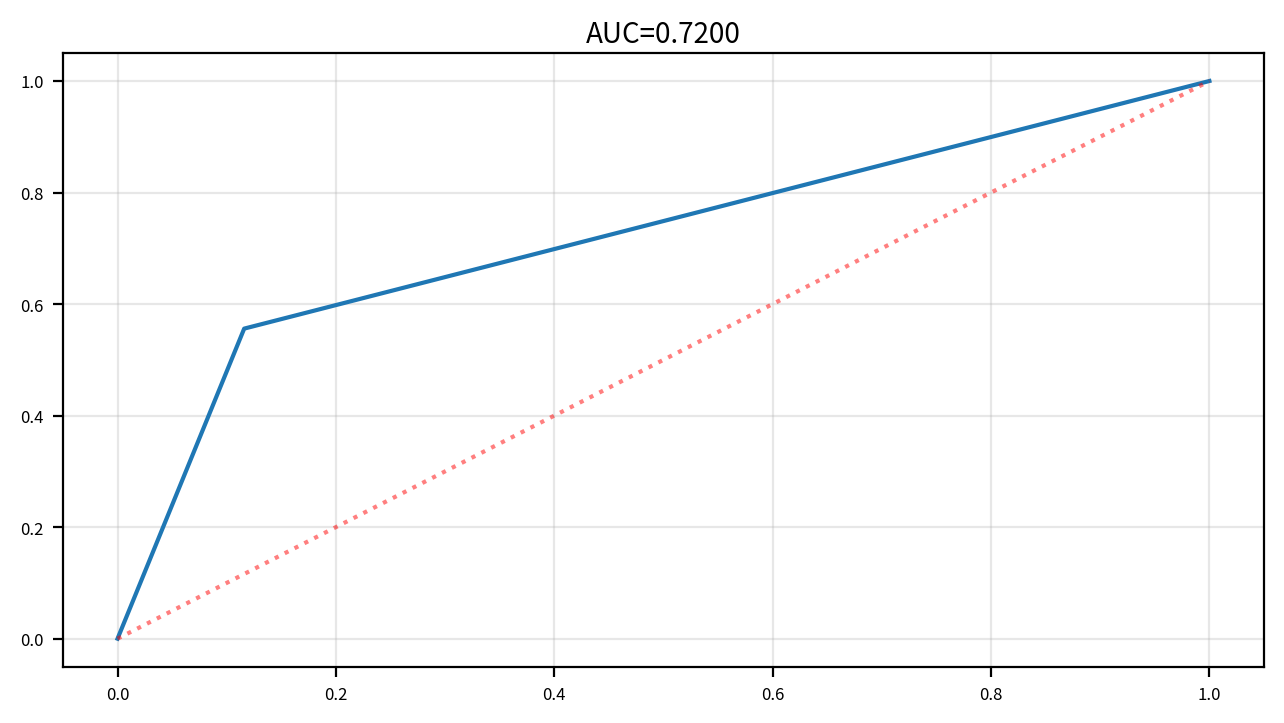

In [22]:
# 패키지 참조
from pandas import DataFrame, get_dummies
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

# 그래프 초기화
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 데이터 입력
yname='Outcome'          # 범주형 종속 변수 (합/불 등)
my_log=True            # 로그변환 필요시 True로 변경 
df=origin.copy()
x=df.drop(yname, axis=1)
y=df[yname]
if my_log:
    log_vars=x.columns
    for v in log_vars:
        df[f'log_{v}']=np.log1p(df[v])
    df.drop(columns=log_vars, inplace=True)
x_input=sm.add_constant(df.drop(yname, axis=1))
fit=sm.Logit(y, x_input).fit()
tbl1=fit.summary()
print(tbl1)

# 데이터 전처리             # 필요 시 사용
# print('='*50)
# print('데이터 전처리')
# print('='*50)
# mydata='⭐'              # 명목형 변수 전처리
# new_dict={}
# my_unique=df2[mydata].unique()
# for i, v in enumerate(my_unique):
#     new_dict.update({v:i})
#     print(f'{mydata}_{i} = {v}')
# df2[mydata]=df2[mydata].map(new_dict)
# df2=get_dummies(df2, columns=[mydata], dtype='int', drop_first=True)

# 결과보고 함수 정의
def logit_report(fit, data, threshold=0.5):
    yname=fit.model.endog_names
    y_true=data[yname]
    y_pred=fit.predict(fit.model.exog)
    y_pred_fix=(y_pred>=threshold).astype(int)

    cm=confusion_matrix(y_true, y_pred_fix)
    tn, fp, fn, tp=cm.ravel()

    acc=accuracy_score(y_true, y_pred_fix)
    pre=precision_score(y_true, y_pred_fix)
    tpr=recall_score(y_true, y_pred_fix)
    fpr=fp/(fp+tn)
    tnr=1-fpr
    f1=f1_score(y_true, y_pred_fix)
    ras=roc_auc_score(y_true, y_pred_fix)

    cdf=DataFrame({
        '설명력(Pseudo-Rsqe)':[fit.prsquared],
        '정확도(Accuracy)':[acc],
        '정밀도(Precision)':[pre],
        '재현율(Recall, TPR)':[tpr],
        '위양성율(Fallout, FPR)':[fpr],
        '특이성(Specif city, TNR)':[tnr],
        'RAS(auc score)':[ras],
        'F1_score':[f1]
    })

    tbl=fit.summary()
    xnames=[n for n in fit.model.exog_names if n!='const']
    x=data[xnames]
    variables=[]
    vif_dict={
        col:variance_inflation_factor(x.values, i)
        for i, col in enumerate(x.columns)
    }

    for v in tbl.tables[1].data:
        name=v[0].strip()
        if name not in xnames:
            continue
        beta=float(v[1])
        se=float(v[2])
        z=float(v[3])
        p=float(v[4])

        or_val=np.exp(beta)
        ci_low=np.exp(beta-1.96*se)
        ci_high=np.exp(beta+1.96*se)

        stars=(
            '***' if p<0.001 else
            '**' if p<0.01 else
            '*' if p<0.05 else
            ''
        )

        variables.append({
            '종속변수':yname,
            '독립변수':name,
            'B(β)':beta,
            '표준오차':se,
            'z':f'{z:.3f}{stars}',
            'p-value':p,
            'OR':or_val,
            'CI_lower':ci_low,
            'CI_upper':ci_high,
            'VIF':vif_dict.get(name, np.nan)
        })
    
    rdf=DataFrame(variables)

    result_report=(
        f'Pseudo R²(McFadden) = {fit.prsquared:.3f}, '
        f'LLR X²({int(fit.df_model)}) = {fit.llr:.3f}, '
        f'p-value = {fit.llr_pvalue:.4f}, '
        f'Accuracy = {acc:.3f}, '
        f'AUC = {ras:.3f}'
    )

    tpl=(
        '%s에 대하여 %s로 예측하는 로지스틱 회귀분석을 실시한 결과, '
        '모형은 통계적으로 %s(X²(%s) = %.3f, p %s 0.05)하였다.'
    )

    model_report=tpl%(
        yname,
        ', '.join(xnames),
        '유의' if fit.llr_pvalue<=0.05 else '유의하지 않음',
        int(fit.df_model),
        fit.llr,
        '≤' if fit.llr_pvalue<=0.05 else '>'
    )

    variable_reports=[]

    s=(
        '%s의 오즈비는 %.3f(p %s 0.05)로, '
        '%s 발생 odds에 %s 영향을 미치는 것으로 나타났다.'
    )

    for _, row in rdf.iterrows():
        variable_reports.append(
            s%(
                row['독립변수'],
                row['OR'],
                '≤' if row['p-value']<=0.05 else '>',
                row['종속변수'],
                '유의미한' if row['p-value']<=0.05 else '유의하지 않은'
            )
        )
    
    return cdf, rdf, result_report, model_report, variable_reports

# 분석결과 보고
cdf, rdf, r, m, v=logit_report(fit, df)
display(cdf)
display(rdf)
display(r)
display(m)
display(v)

# AUC 시각화
y_true=df[yname]
y_prob=fit.predict(fit.model.exog)
y_pred=(y_prob>=0.5).astype(int)
ras=roc_auc_score(y_true, y_pred)
roc_fpr, roc_tpr, thresholds=roc_curve(y_true, y_pred)
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.lineplot(x=roc_fpr, y=roc_tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
ax.grid(True, alpha=0.3)
ax.set_title(f'AUC={ras:.4f}', fontsize=10, pad=4)
plt.tight_layout()
plt.show()
plt.close()

# 데이터 입력을 통한 예측 (필요시 사용)
# print('='*50)
# print('데이터 예측')
# print('='*50)
# myinput=[]
# for i, v in enumerate(x.columns):
#     myinput.append(input(f'{x.columns[i]}를(을) 입력해주세요.'))
# mydict={}
# for i in range(0,len(x.columns)):
#     mydict.update({x.columns[i]:float(myinput[i].strip())})
# x_new=DataFrame([mydict])
# x_new_input=sm.add_constant(x_new, has_constant='add')
# myresult=fit.predict(x_new_input)
# print(myresult)